In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv(r"C:\Users\Kiran\Downloads\diabetes.csv")
print(data.head())
print(data.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [12]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [13]:
#The above shows there is a significant amount of skewness with most columns positively skewed.
#Scaling of the data is important to treat this for accurate results.
#We could see some values in columns like Glucose, BloodPressure, SkinThickness, Insulin, BMI has value 0 which is not possible. 
#To treat these we will first replace them with Nan and then to mean or median of the column

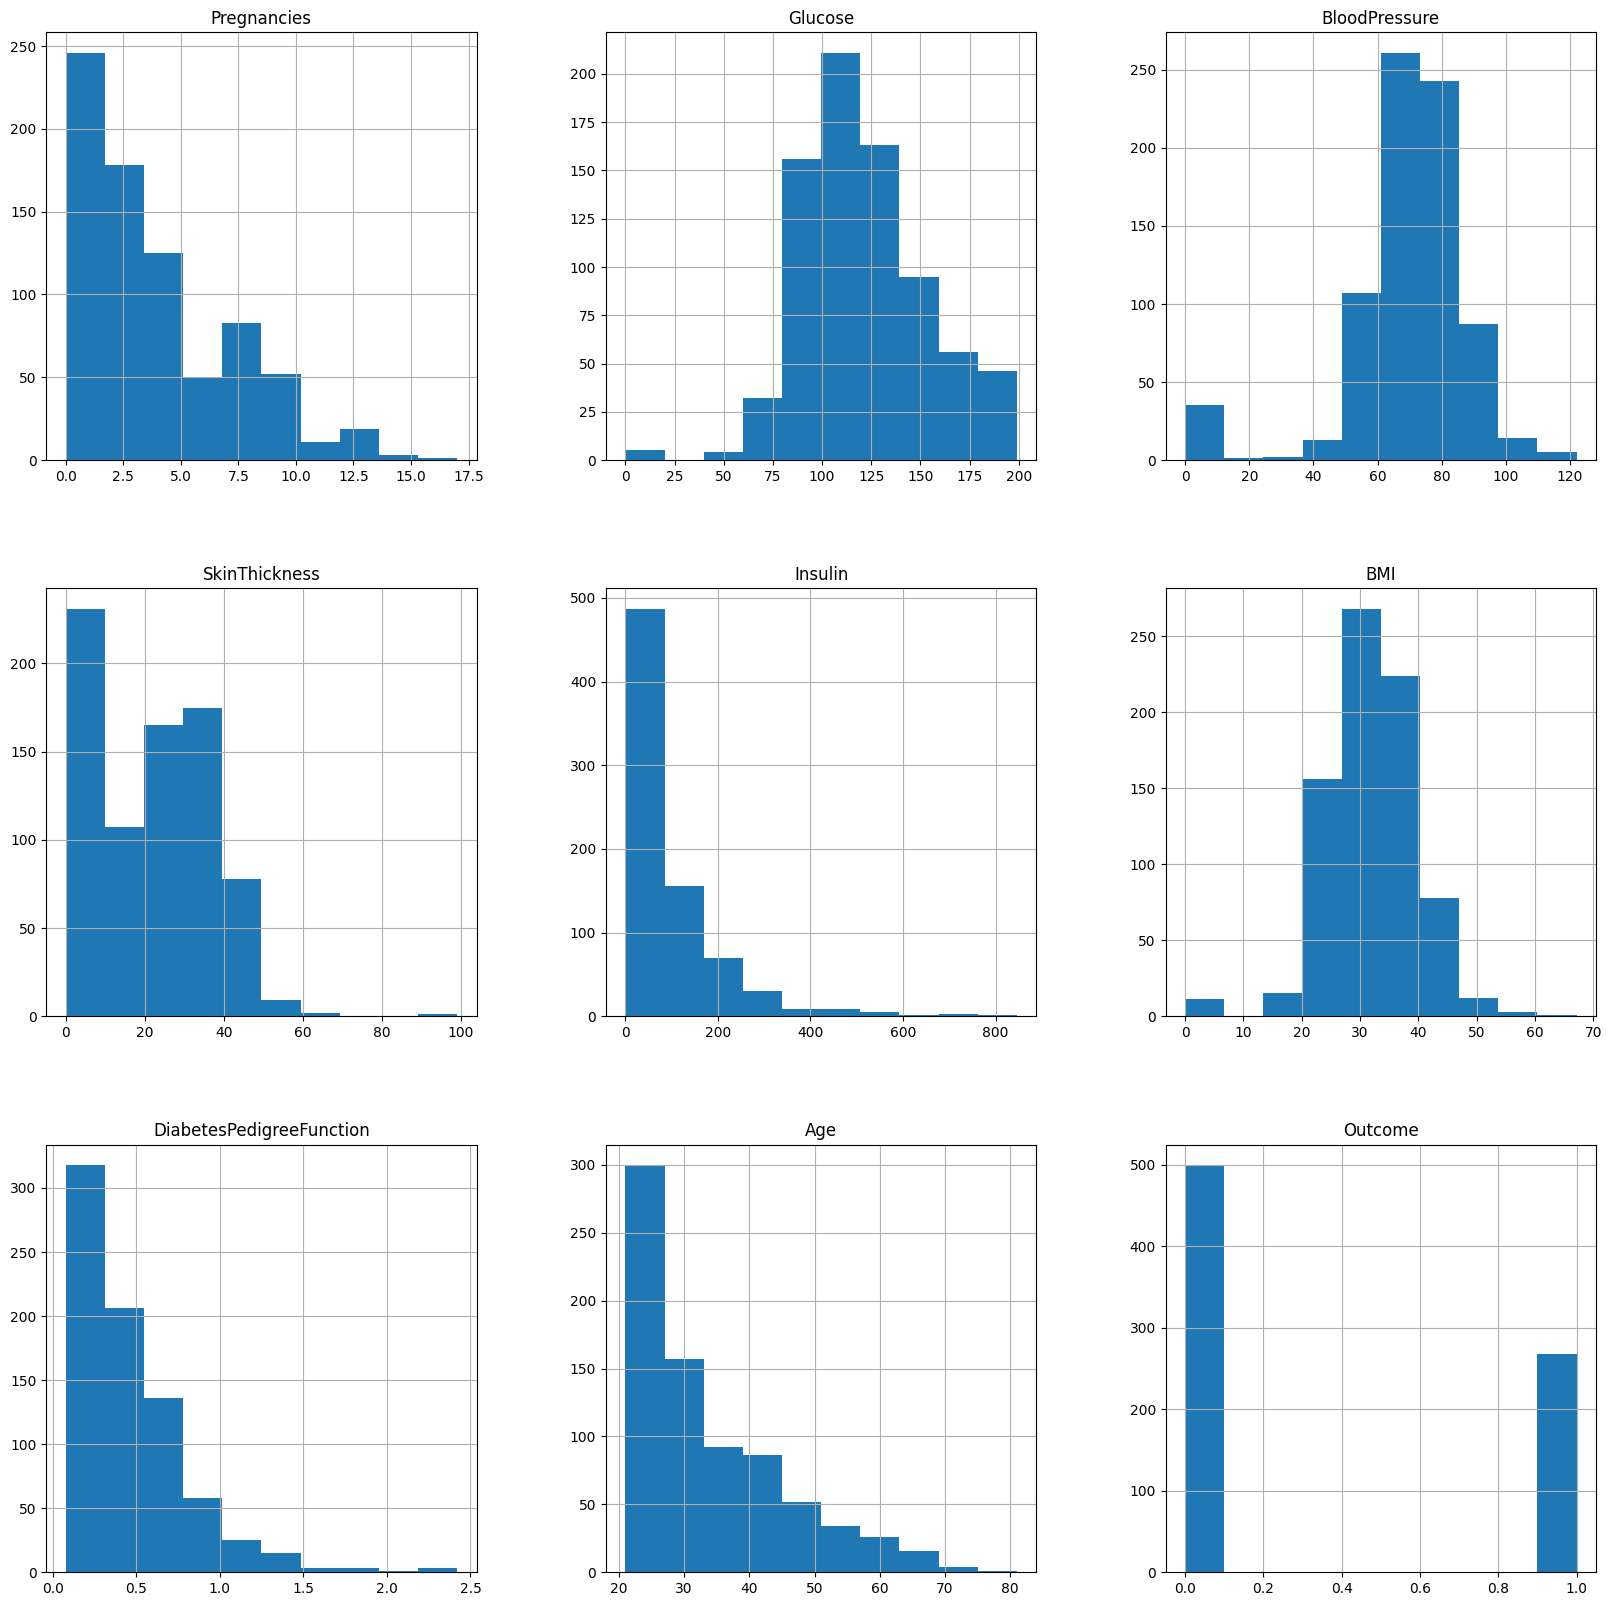

In [14]:
#Before replacing 0 with Nan
data.hist(figsize=(20,20));

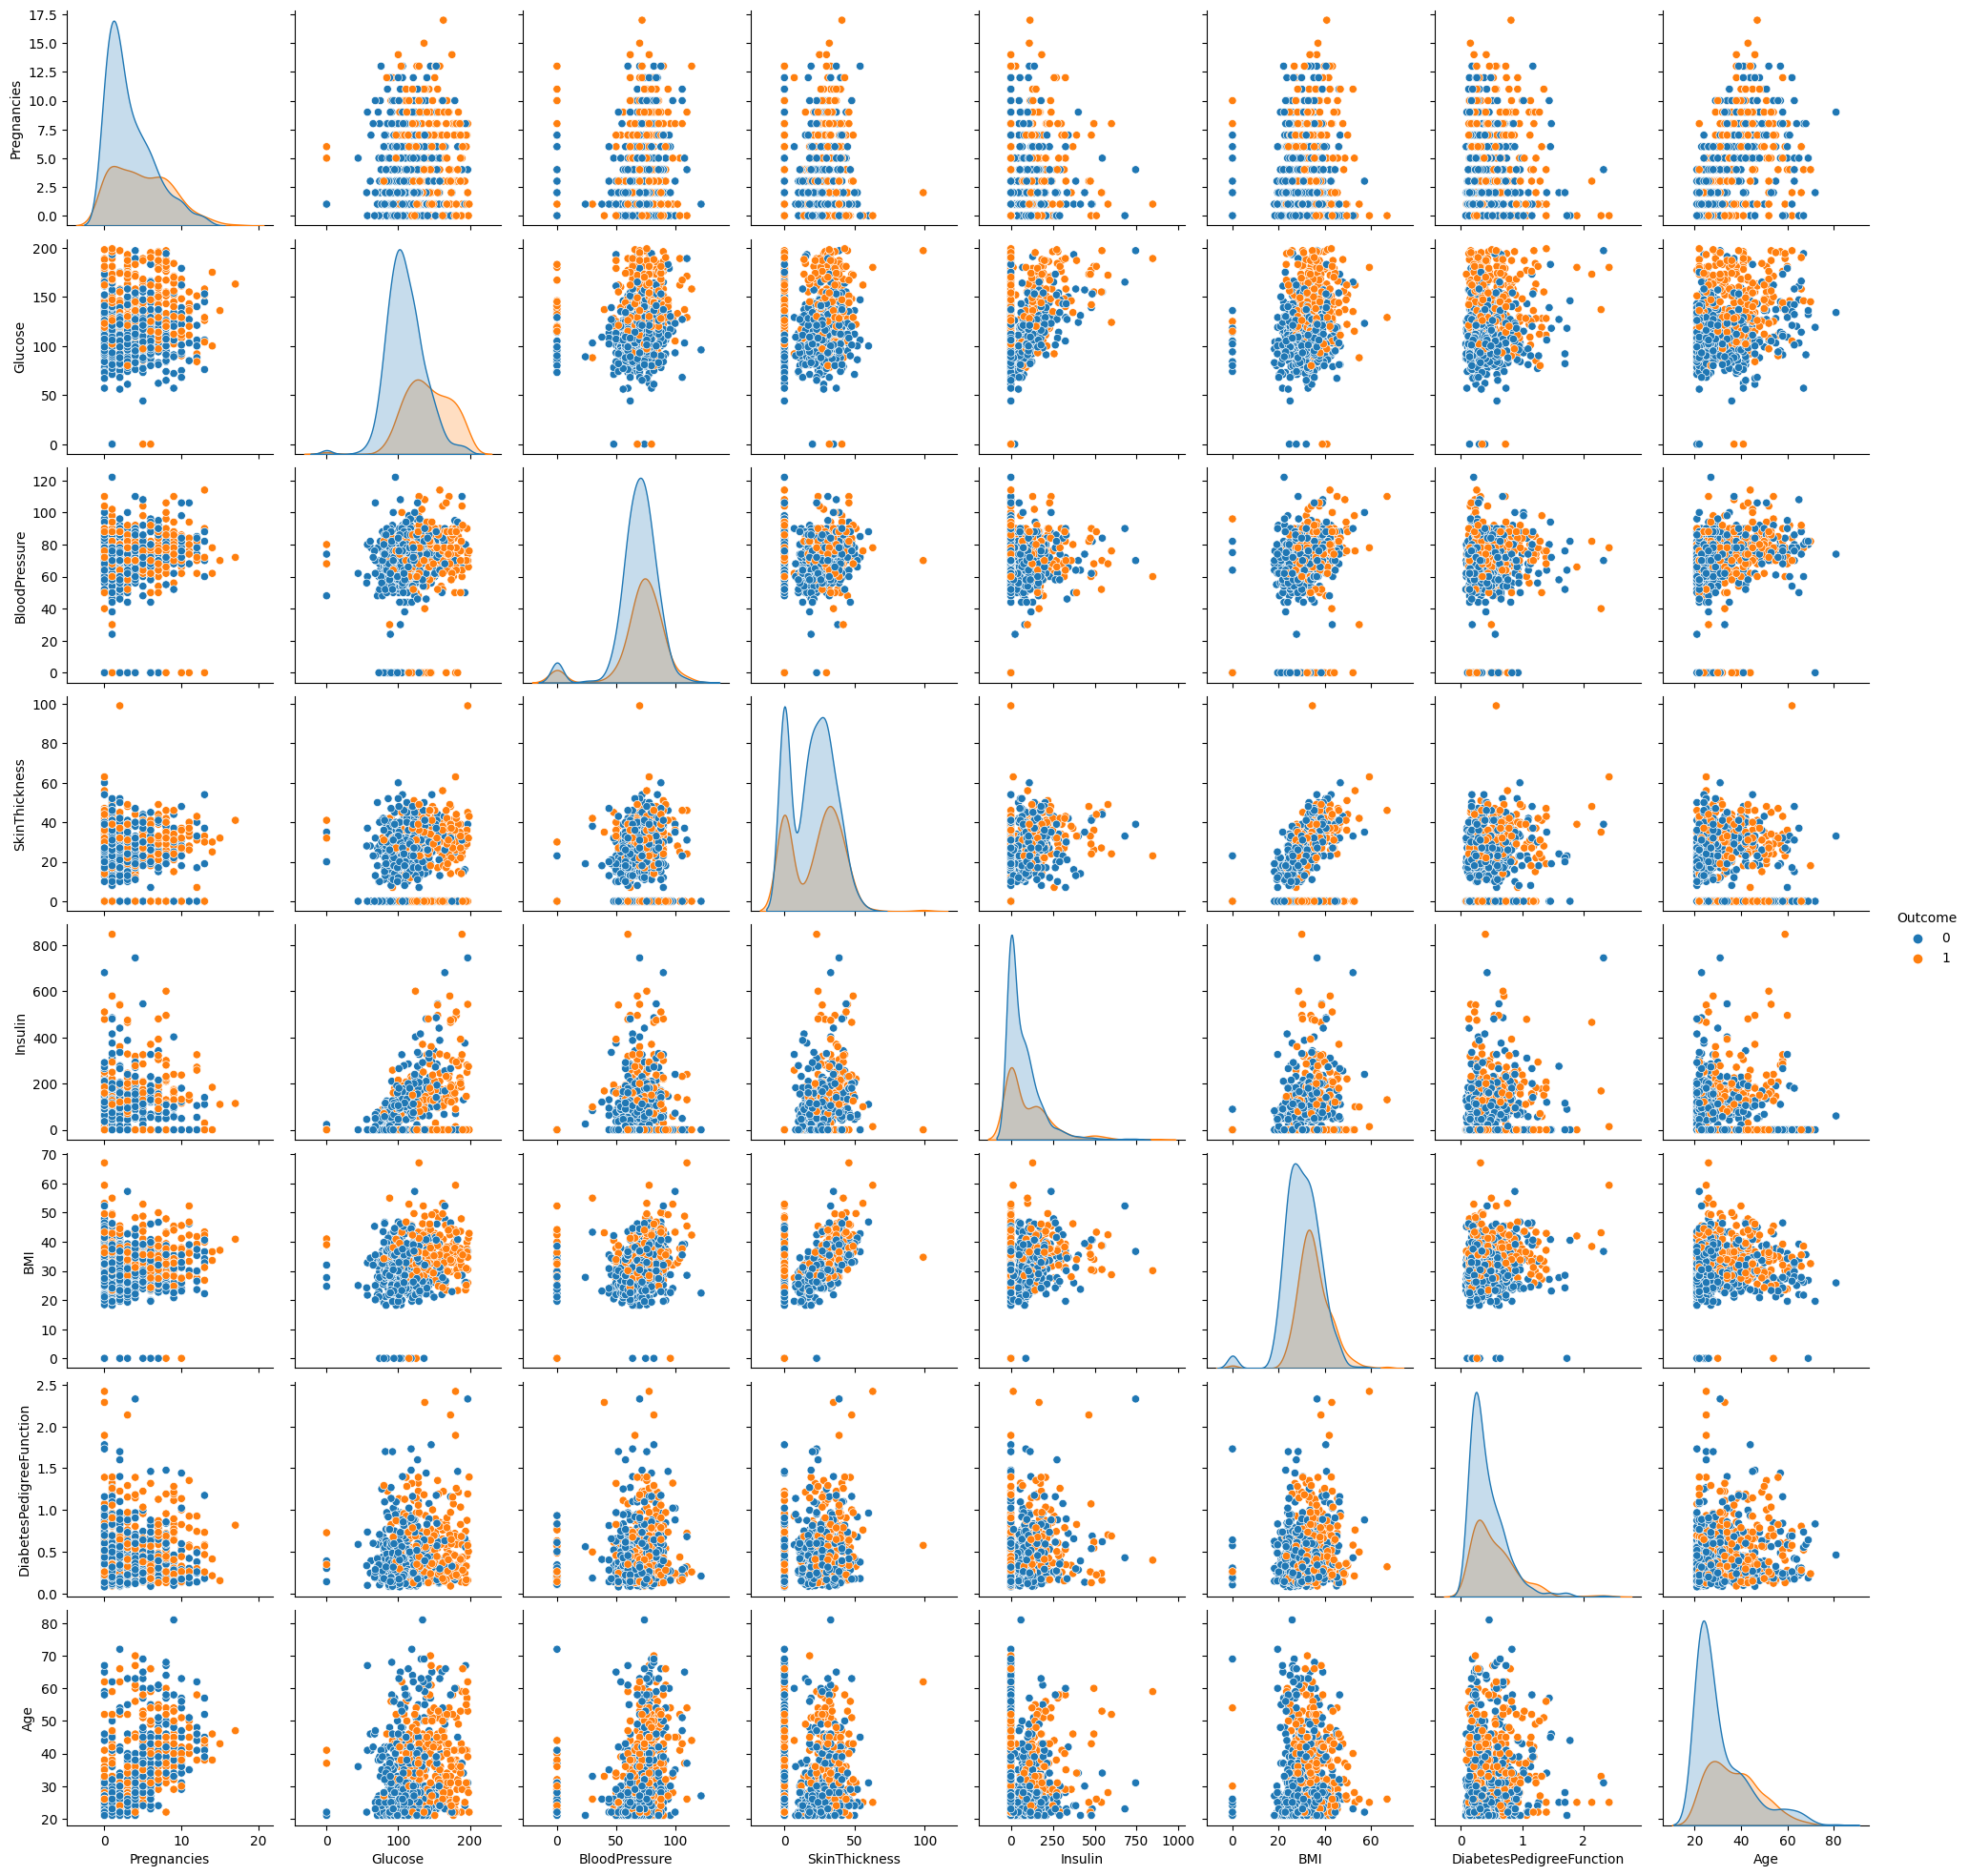

In [15]:
sns.pairplot(data=data, hue='Outcome');

In [16]:
df=data.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

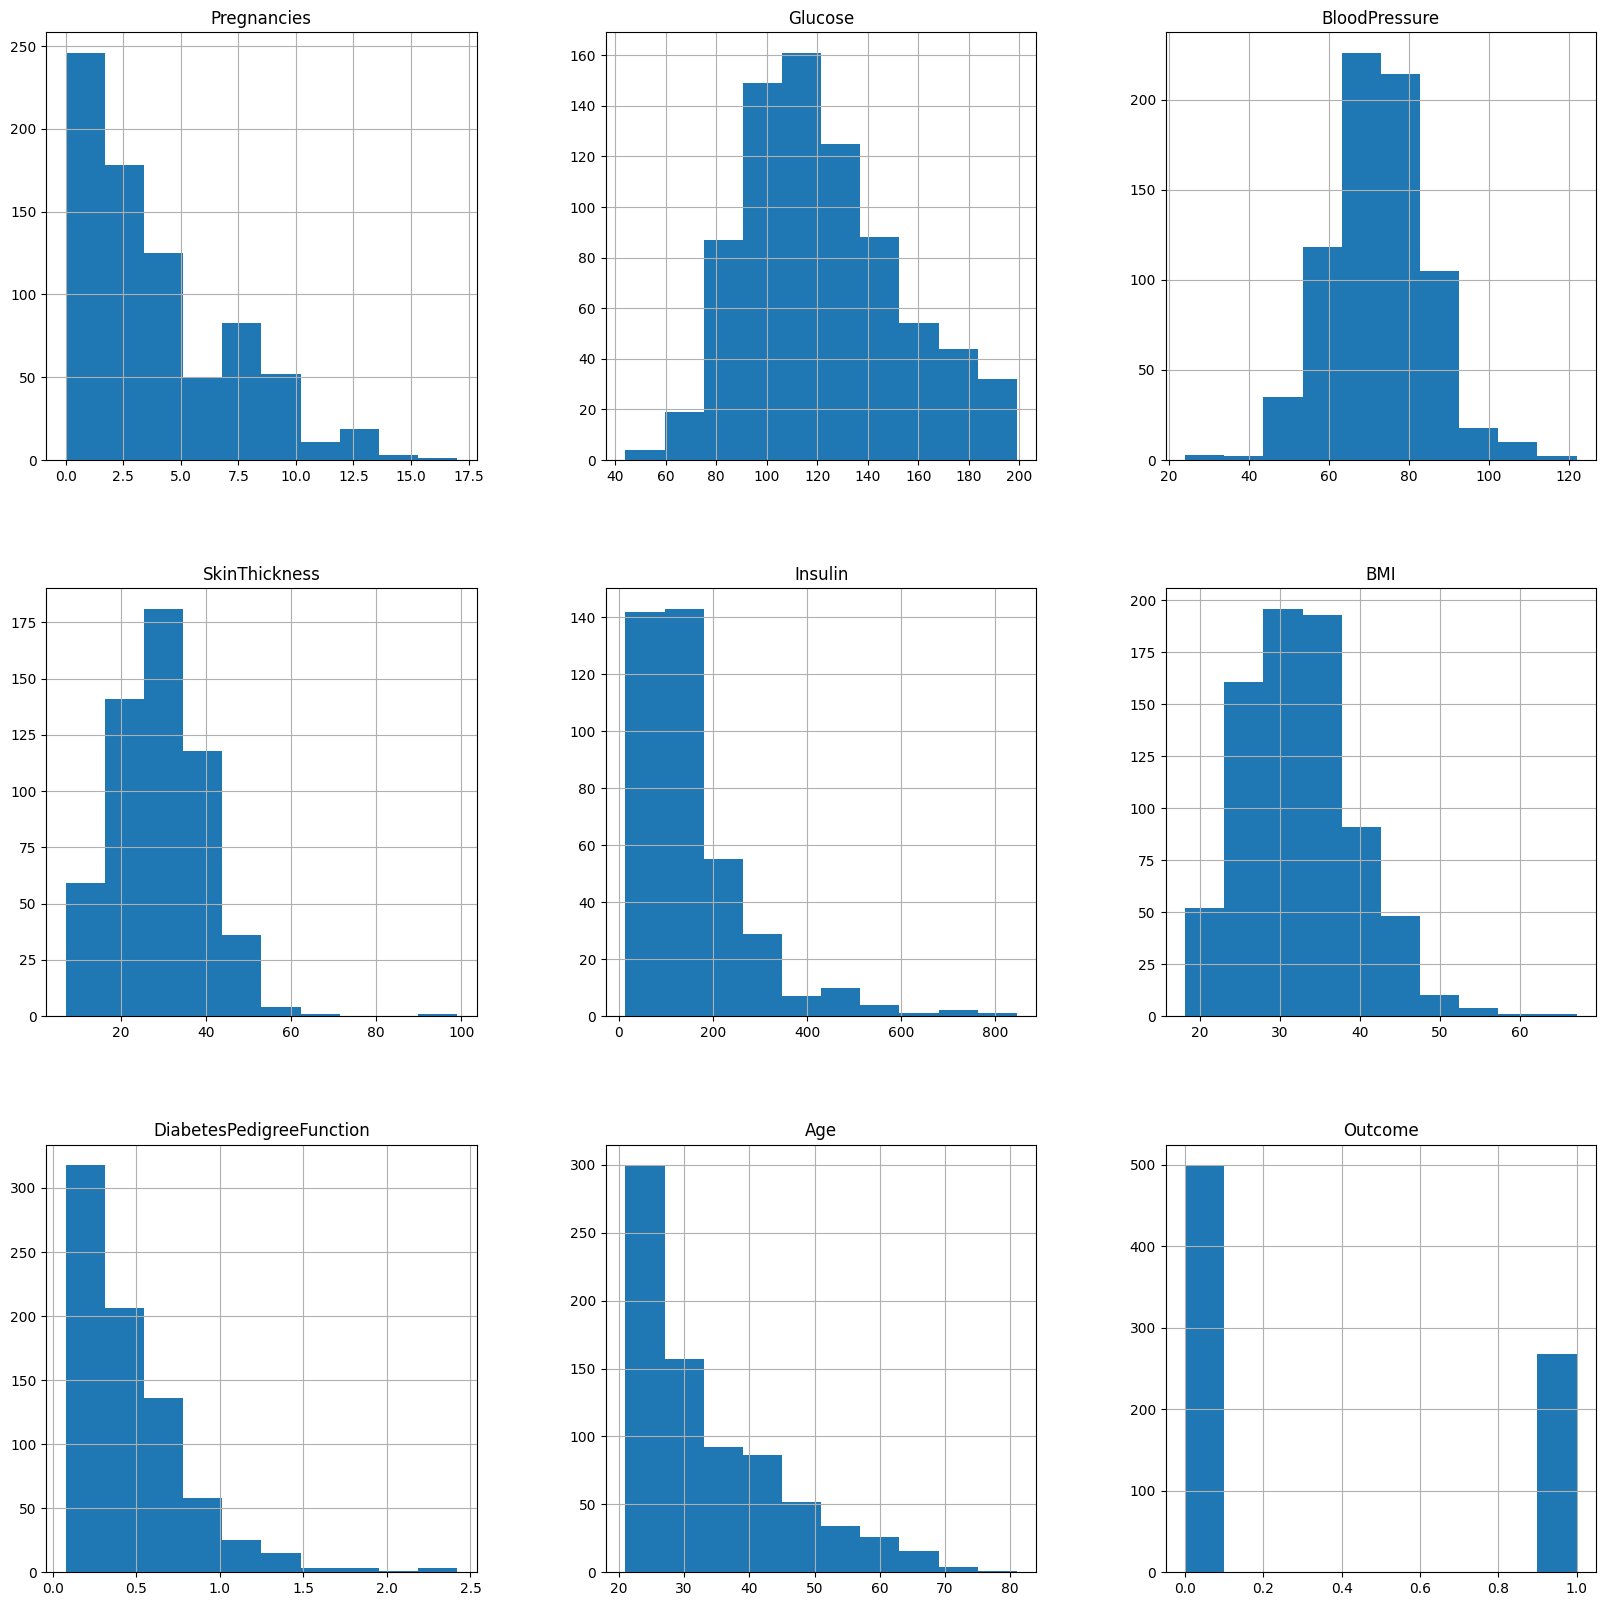

In [18]:
#After replacing 0 with Nan
df.hist(figsize=(20,20));

In [19]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

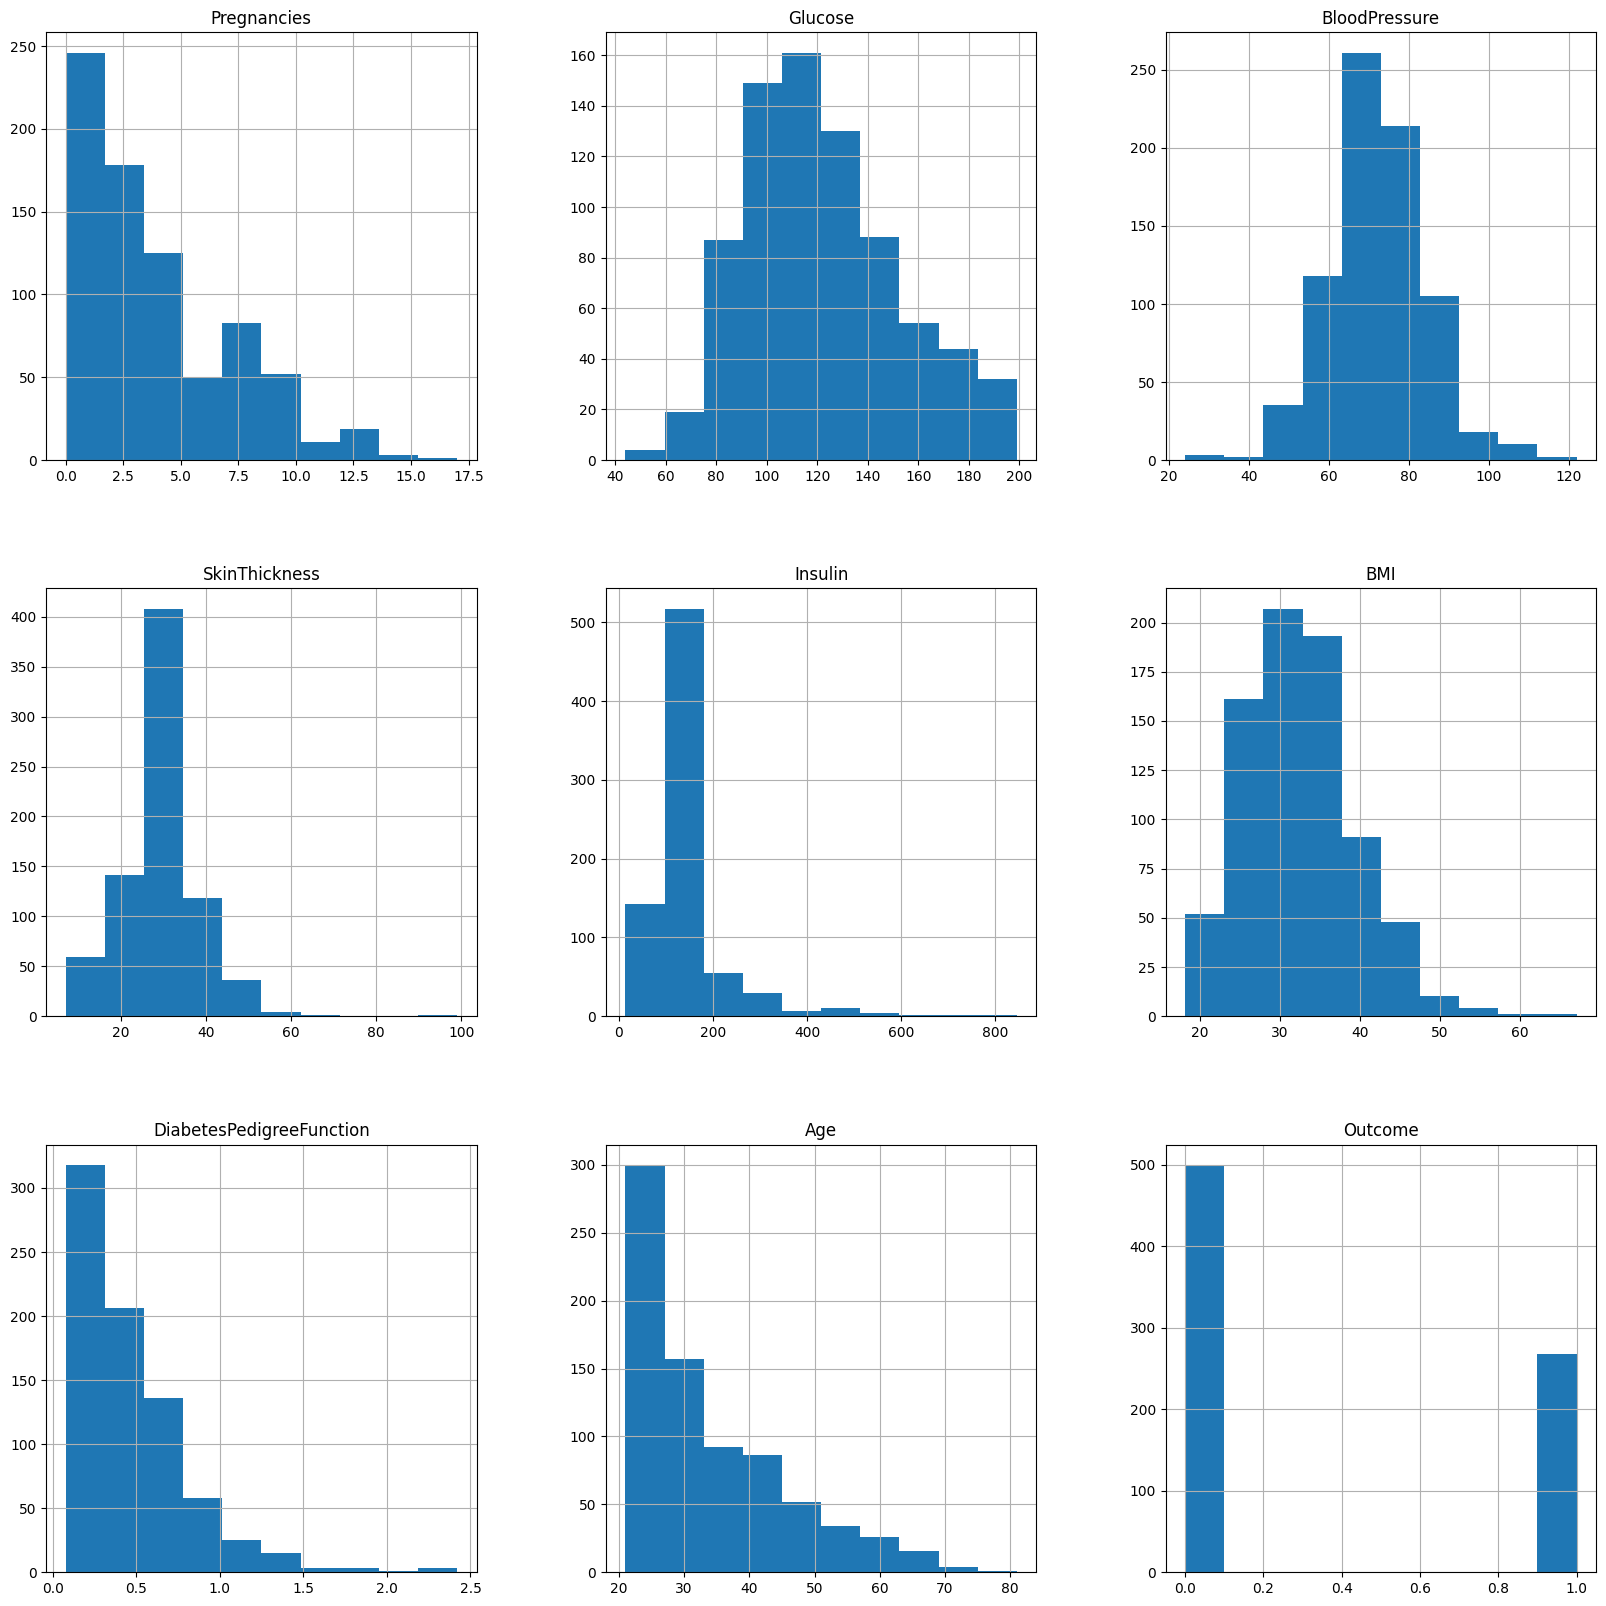

In [21]:
#After Treating null values
df.hist(figsize=(20,20));

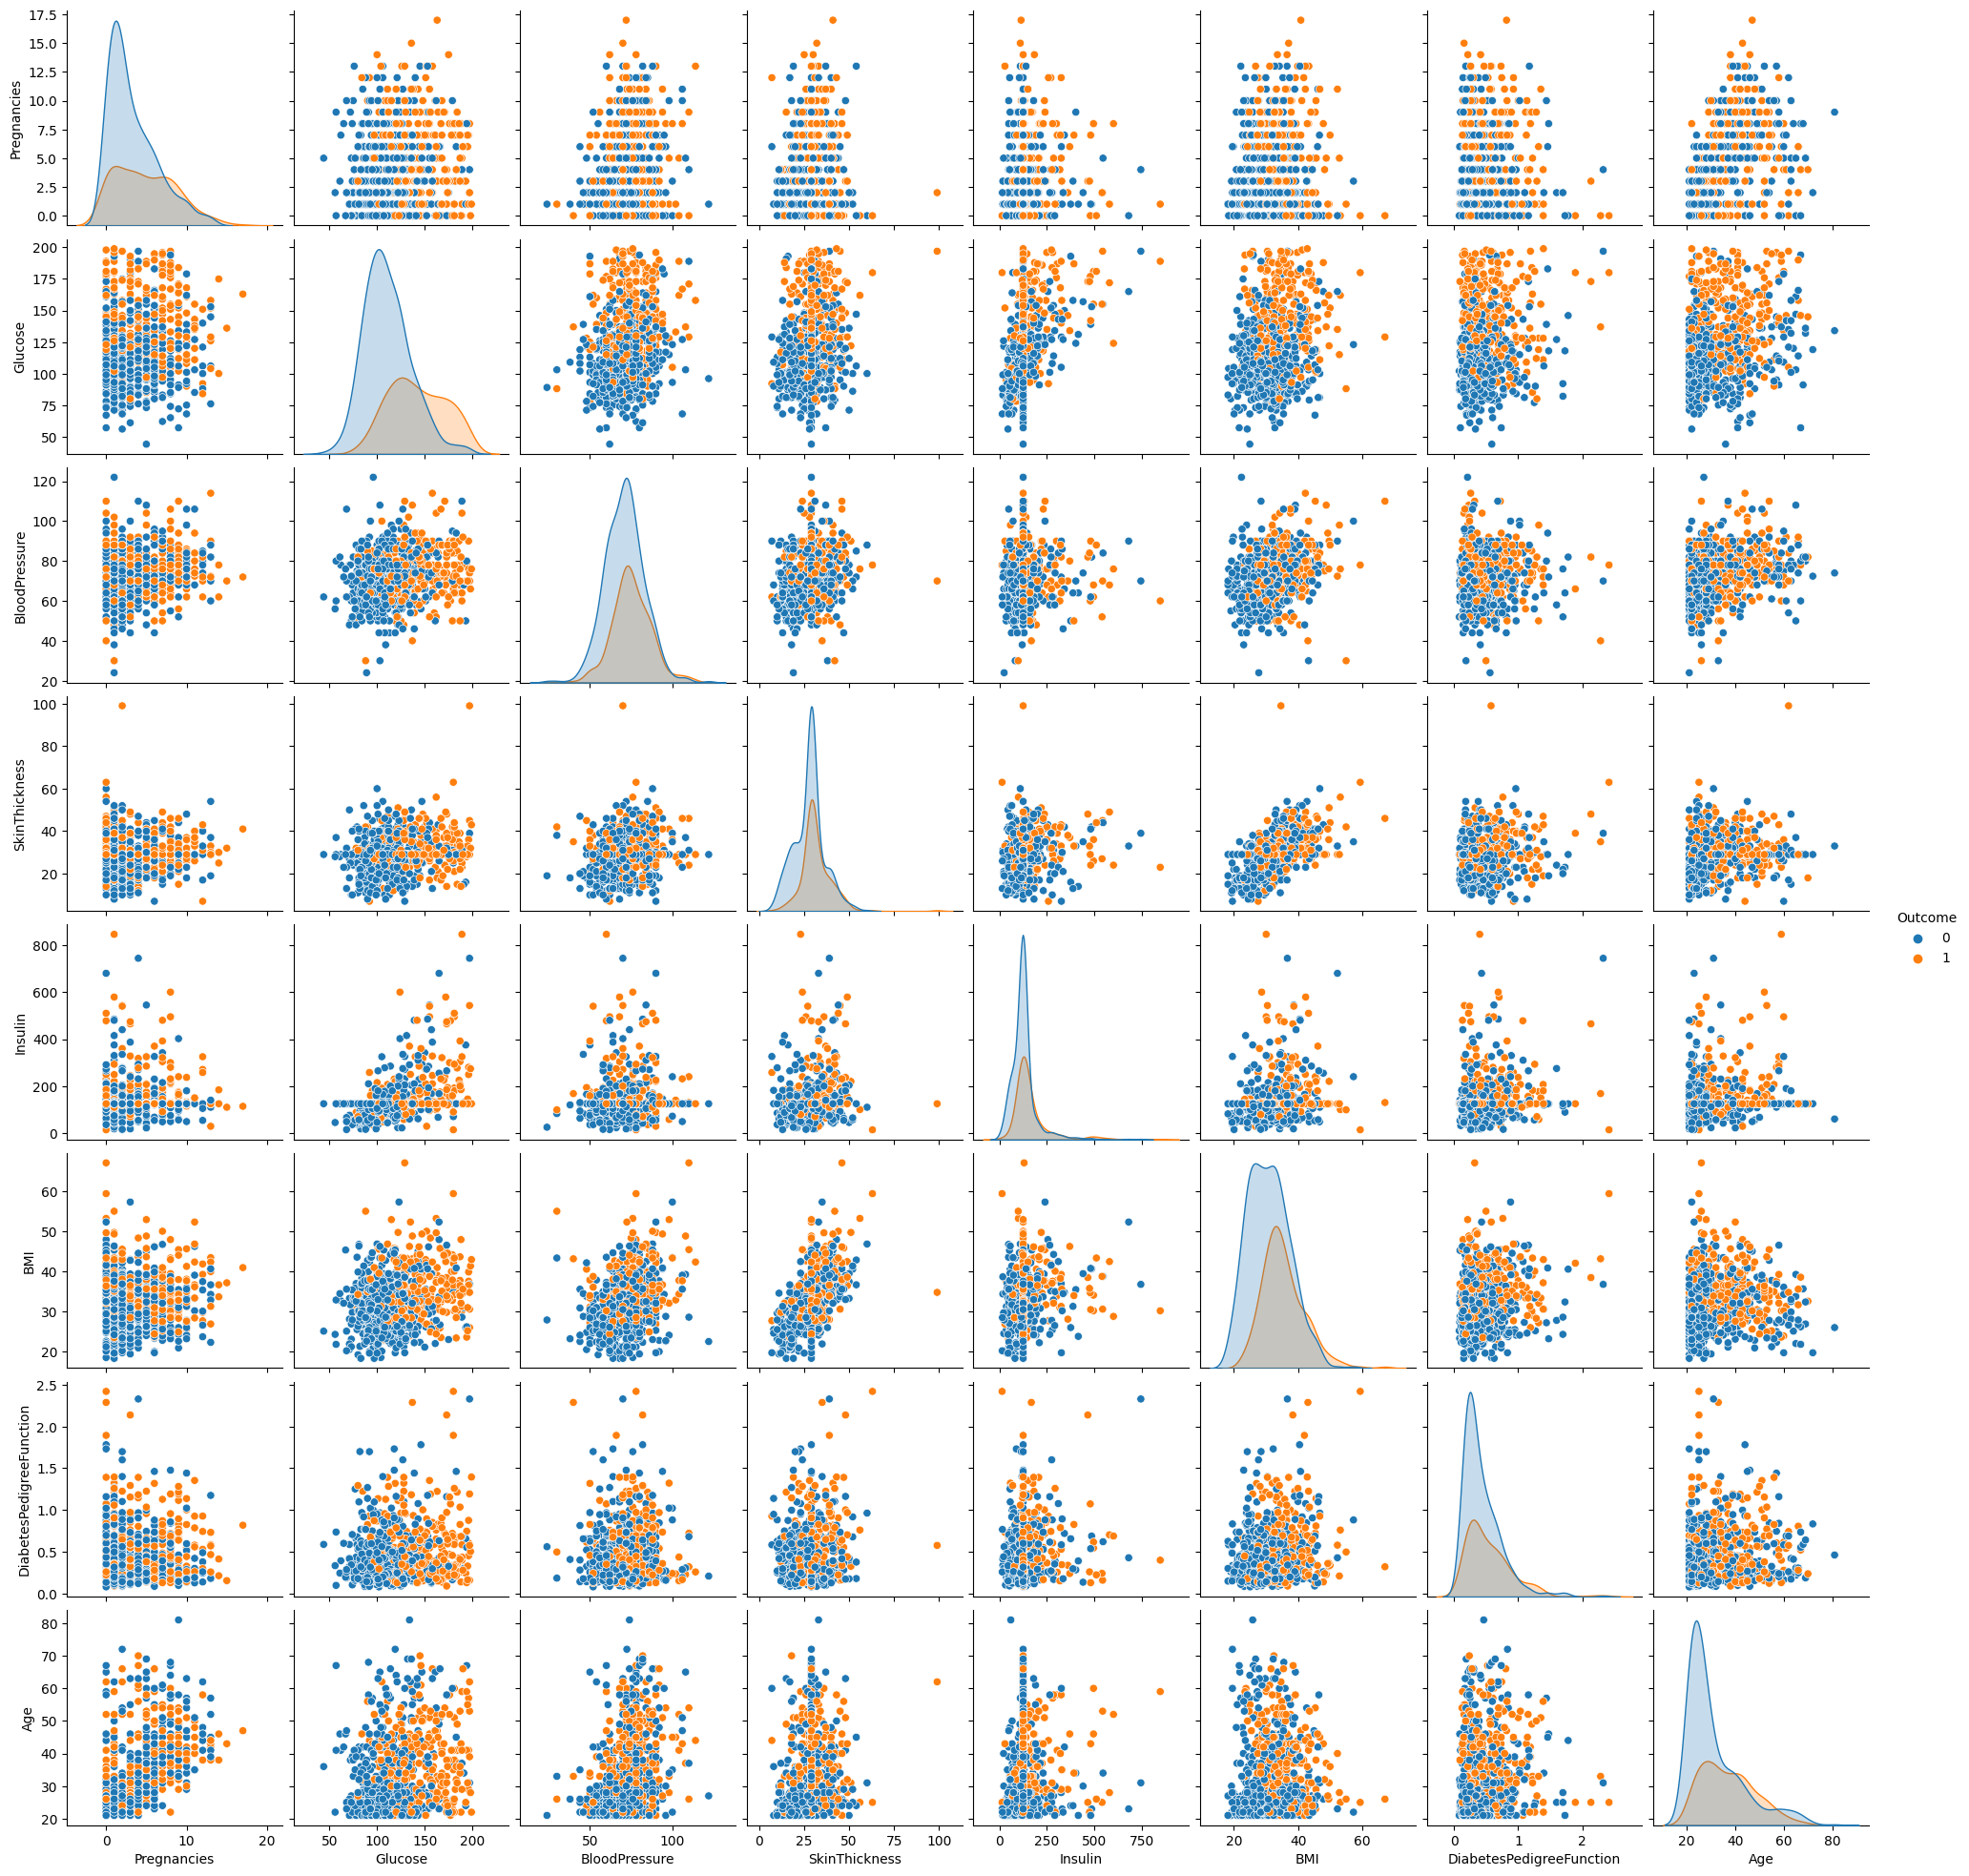

In [22]:
sns.pairplot(data=df, hue='Outcome');

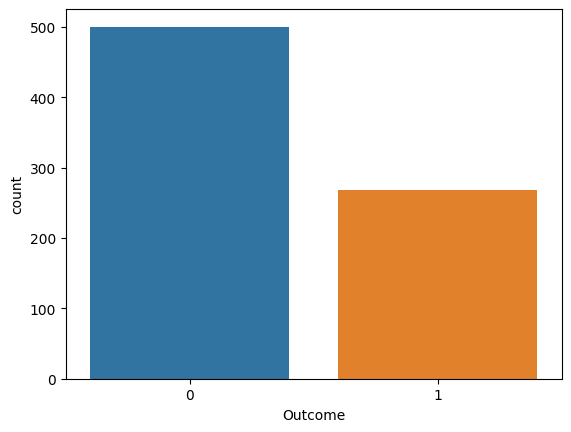

In [23]:
sns.countplot(data=df, x='Outcome');

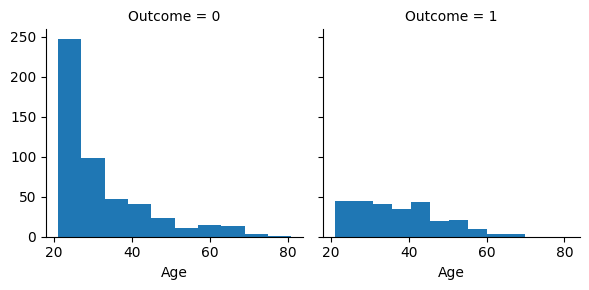

In [24]:
g=sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Age')
plt.show();

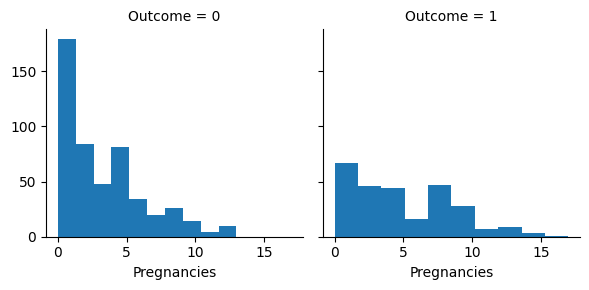

In [25]:
g=sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Pregnancies')
plt.show();

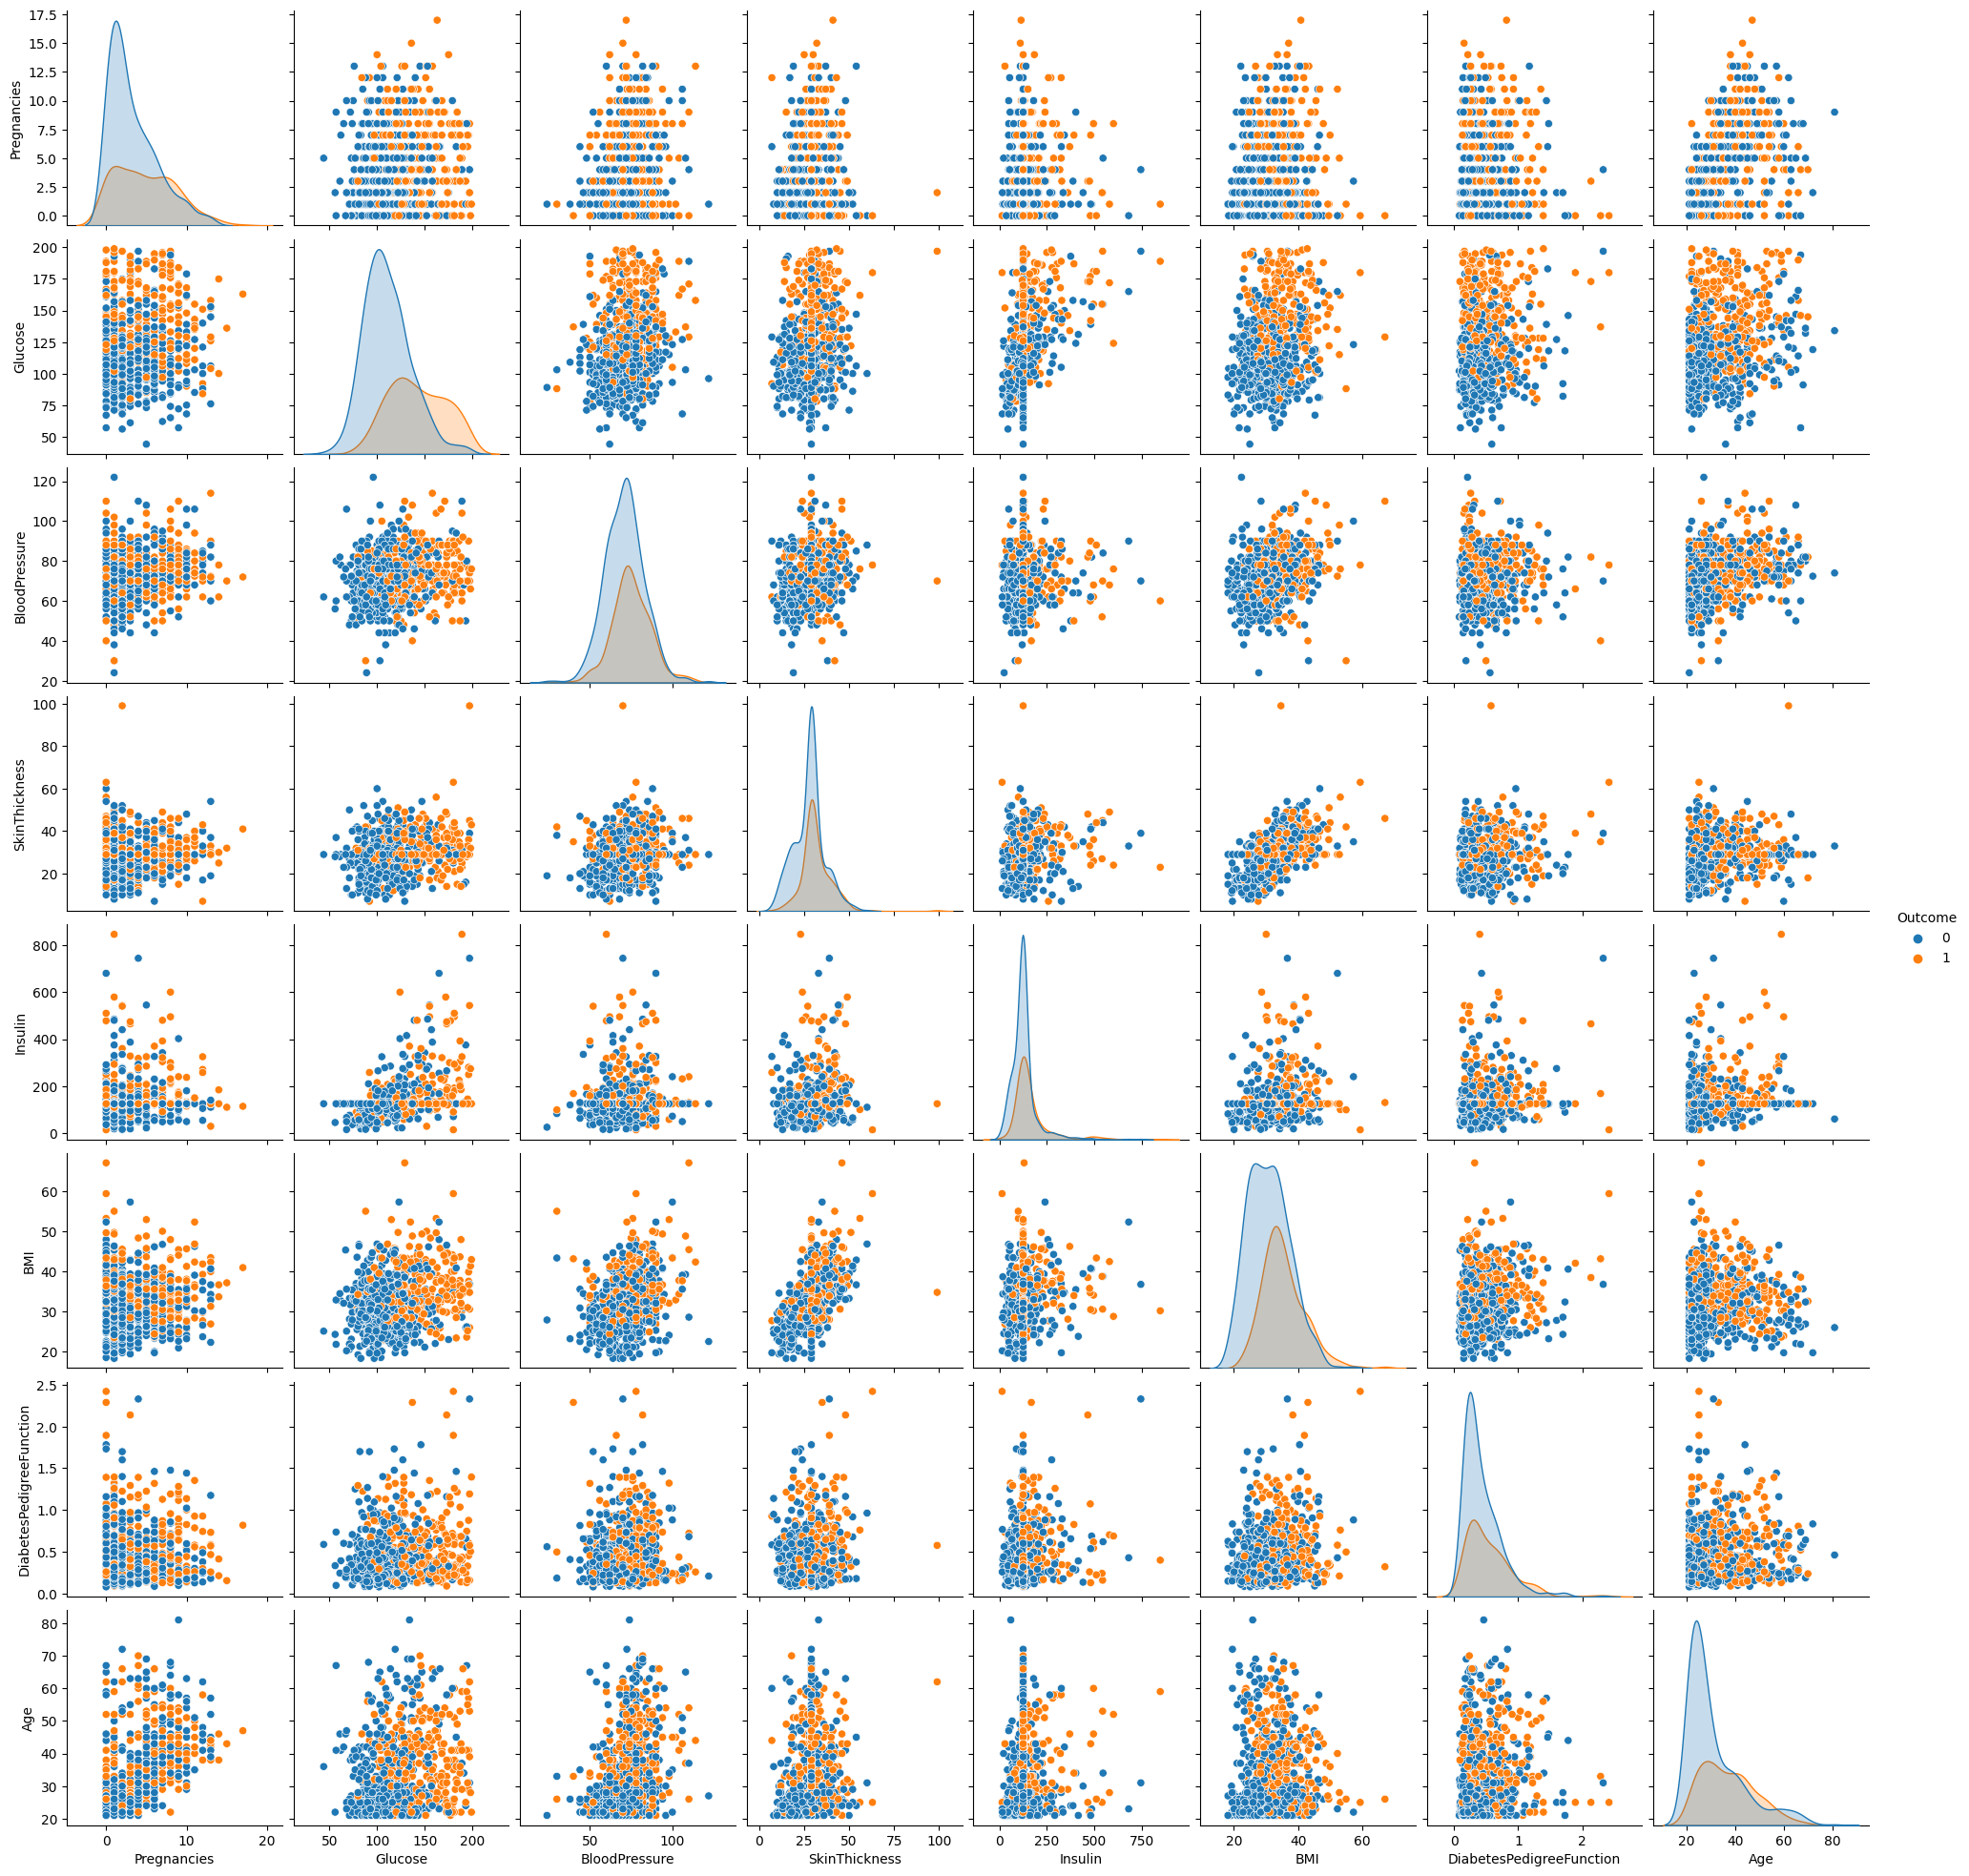

In [26]:
sns.pairplot(data=df, hue='Outcome');

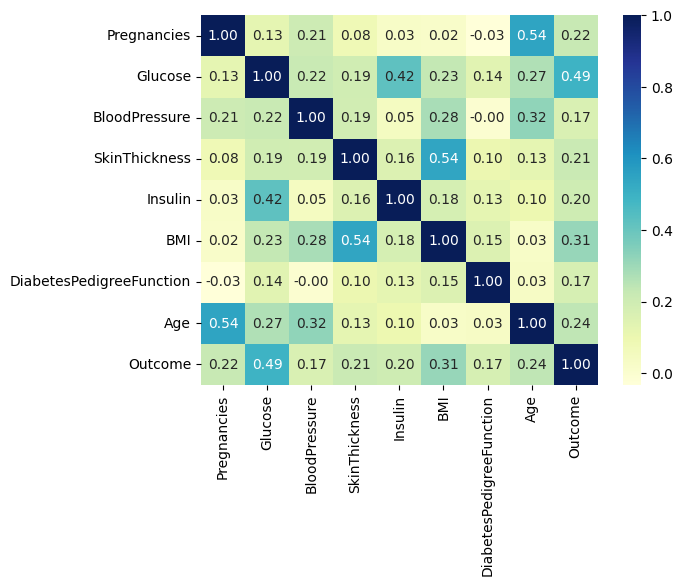

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f');

In [52]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=pd.DataFrame(sc_x.fit_transform(df.drop(['Outcome'], axis=1), ),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [53]:
y=df.Outcome
print (x.head())
print (y.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [30]:
#Now that the data is treated and ready, let us get on with Model Building. As this is a classification data, lets start with:
#Logistic Regression
#KNN Classifier
#Decision Tree
#Random Forest
#Boosting Techniques

In [54]:
#Train Test Split (70:30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, stratify=y)

In [55]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [56]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7229437229437229

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = lr.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

0.7229437229437229
[[128  22]
 [ 42  39]]


In [62]:
#Let us try tuning the Logistic Regression Model, to see if this improves the performance of model
lr_tuned = LogisticRegression(class_weight='balanced', max_iter=50)

In [63]:
lr_tuned.fit(x_train, y_train)
lr_tuned.score(x_test, y_test)

0.7056277056277056

In [65]:
Scores = pd.DataFrame({'Model':['Logistic Regression'], 'Test Accuracy':[72.29]})
print(Scores)

                 Model  Test Accuracy
0  Logistic Regression          72.29


In [66]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier 

In [67]:
train_score=[]
test_score=[]

for i in range (1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [68]:
max_train_score = max(train_score)
train_scores_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [69]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.02597402597402 % and k = [13]


In [70]:
#From above we can see that the best score of KNN is at 13
KNN=KNeighborsClassifier(13)
KNN.fit(x_train, y_train)
KNN.score(x_test, y_test) 

0.7402597402597403

In [75]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score for KNN:" + str(knn_cv.best_score_))
print("Best Parameters for KNN: " + str(knn_cv.best_params_))

Best Score for KNN:0.7721840251252015
Best Parameters for KNN: {'n_neighbors': 25}


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [81]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6536796536796536

In [82]:
rf=RandomForestClassifier(class_weight='balanced_subsample')
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7272727272727273

In [84]:
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb.score(x_test, y_test)

0.7402597402597403

In [85]:
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
ad.score(x_test,y_test)

0.7229437229437229

In [91]:
base_classifier=RandomForestClassifier(random_state=42, n_estimators=100)
bg= BaggingClassifier(base_classifier, n_estimators=50)
bg.fit(x_train, y_train)
bg.score(x_test, y_test)

0.7229437229437229

In [93]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train, y_train)
xg.score(x_test, y_test)

0.7359307359307359

In [94]:
Scores = pd.DataFrame({'Model':['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'Ada Boosting', 'Gradient Boosting', 'Bagging with RF', 'XGB Model'], 
                       'Test Accuracy':[72.29, 77.21, 72.72, 65.36, 72.29, 74.02, 72.29, 73.60]})
print(Scores)

                 Model  Test Accuracy
0  Logistic Regression          72.29
1                  KNN          77.21
2        Random Forest          72.72
3        Decision Tree          65.36
4         Ada Boosting          72.29
5    Gradient Boosting          74.02
6      Bagging with RF          72.29
7            XGB Model          73.60


In [95]:
#As we see the above scores, KNN is the optimal model for Diabetes Classifiction with 77% accuracy